# Netflix next banger

## Background

Netflix is a member-based internet entertainment service founded in 1997. The service allows members to watch tv-series, movies and documentaries through a streaming software on internet-connected devices against a monthly fee. Netflix’s content relies on a complex structure of algorithms that watches customer’s online use and are supposed to optimize satisfying decisions. Thus the company is in great need of user data. (Clares-Gavilán, Fernández-Manzano och Neira 2016, 568-576)

The company’s operational environment is characterized by hands-off approach to management. The workforce is heterogeneous, about 3,500 people who 
leaders trust to have the company’s best interests at heart and act correspondingly. (Gulati 2018, 4-13).  Furthermore a majority of Netflix’s content is from outside sources and the company’s operational flexibility is limited by outside partners (Ciejka 2018, 3-38).


## Problem description

As an effect of high competition and slow growth in the number of new subscribers Netflix share price has declined in fall 2019, hence Netflix wants to maximize the success of their next creation. The problem lies in not knowing what will be best received by the public. (Ny Teknik, 2019)

Additionally, by having some of its content come from outside sources, part of the problem becomes choosing the right content. If Netflix have to choose between several newly released movies or series, how will they know which one has the best chance of success?

In our project we will gather data from movies and their scripts. We will look for commonly used words, actors, genres and directors to predict which attributes Netflix should be the most interested in when creating their next movie and also which outside-produced movies they should add to their assortment. Finally upcoming movies will also be discussed with our analysed data in mind.


## Previous Studies
There are many different researches that has been carried out in the field using different approaches. Most of the studies found focuses on extracting data from social media to map how users online discussions, like reviews etc can predict a movies success. There are fewer studies that focuses on the attributes of a movie to explore how this is related to a movies success. 

In Ahmad et. al’s study Movie Success Prediction Using Data Mining (2017) the authors presents a study which aims to predict a movies success based on the weighted attributes budget, actors, director, producer, set locations, story writer, movie release day, competing movie releases at the same time, music, release location and target audience. The weighing is done using a mathematical model. It’s stated that “success cannot be predicted based on a particular attribute” and therefore weighing of multiple attributes will be integrated in this study as well. Furthermore the study gives a basic framework in how to value different attributes and what method to consider for the data mining. Lastly, the article shows how classification and clustering can be used in the context of prediction. It also gives a reference point to compare the results of this study to. 

Another similar study is Hammad Afzals article Prediction of Movies popularity Using Machine Learning Techniques (2016) which describes how machine learning approaches can predict an movies success based on datasets of IMDB scores and attributes. The most important finding of this article regarding the work of this report is that the attributes which contributed with most information was metascore and number of votes for each movie, Oscar awards won by the movies and the number of screens the movie is going to be screened which is considered in the choosing of attributes for this report. 

Furthermore Meenakshi et al also try to determine a movies success using several of the same attributes in their 2018 study. In the paper A Data mining Technique for Analyzing and Predicting the success of Movie they employ a decision tree together with clusters to categorize movies as either “Flop”, “Average” or “Hit”. They found that budget was no indication of how well a movie would be rated, and that genre was the most important node in their decision tree. (Meenakshi et al. 2018, 1-6)

The paper Predicting movie success and academy awards through sentiment and social network analysis talks about how much influence online communities have on the actual success of movies. The paper focuses on a model that that predicts academy award nominees by researching the opinions of online communities. Afterwards it uses the same approach to see if there is a correlation between online communities and movie success at the box office. By doing this, the study were able to predict different real events, such as nine academy award winners, by considering and using mentioned models on social networks in movie communities online.(Jonas Sebastian Krauss et al. 2008, 9-10). 


## Data collection

importing data from 4 separate tables: 
 - movies_metadata, containing several diffrerent attributes
 - title_principals, containing a connection between a movie and its cast members
 - movie_names, containing information about cast members
 - data_ratings, containing ratings from imdb 

In [1]:
import numpy as np
import csv

movie_data = []
title_principals = []
movie_names = []

with open('movies_metadata.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        movie_data.append(row)
        
with open('title_principals.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        title_principals.append(row)

with open('movie_names.tsv', encoding="utf8") as tsvfile4:
    reader_rating = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_rating:
        movie_names.append(row)

Defining some functions needed later:

In [2]:
def get_number(string):
    try:
        return (int) (string[2:])
    except:
        return 0
    
def custom_sort(t):
    return t[0]

# Formats a string read from .csv file intended to be an array.
def string_to_array(arraystring):
    arraystring = arraystring.replace(' ', '')
    arraystring = arraystring.replace('[', '')
    arraystring = arraystring.replace(']', '')
    arraystring = arraystring.replace('\'', '')
    array = arraystring.split(',')
    return array

def string_to_array_null(arraystring):
    arraystring = arraystring.replace(' ', '')
    arraystring = arraystring.replace('[', '')
    arraystring = arraystring.replace(']', '')
    arraystring = arraystring.replace('\'', '')
    array = arraystring.split(',')
    if(len(array) == 0):
        return None
    else:
        return array

def try_parse_float(input):
    try:
        number = float(input)
    except:
        number = -1
    return number

# Takes a actor-id and returns a name
def get_name(actor):
    actor_id = get_number(actor)
    count = 0
    for name in movie_names:
        count += 1
        if(actor == name[0]):
            return name[1]

Selecting attributes, formatting genres

In [160]:
movie_data_np = np.array(movie_data[1:])
movie_data_selected_attributes = []

# Selecting attributes
for movie in movie_data_np:
    if(len(movie) > 22):
        movie_data_selected_attributes.append([movie[6], movie[3], movie[8], movie[14], movie[22], movie[23]])
        
movie_data_stripped_genres = []

# Rearranging genres
for movie in movie_data_selected_attributes:
    genre_arr = movie[1].split('\'')
    genres = []
    for i in range(5, len(genre_arr), 6):
        genres.append(genre_arr[i])       
    movie_data_stripped_genres.append([movie[0], genres, movie[2], movie[3], movie[4], movie[5]])

movies_above_7 = []

movie_data_stripped_genres.sort(key=custom_sort)

# Filter out movies with rating < 7.0
for movie in movie_data_stripped_genres:
    if(try_parse_float(movie[4]) >= 7.0):
        movies_above_7.append(movie)
        
movies_above_7 = movies_above_7[3:]
movies_with_crew = []

# Iterate through title_principals and movies_above_7, join on id.
j = 0
movie_id = 0
for i in range(len(title_principals)):
    title_id = get_number(title_principals[i][0])
    while(movie_id < title_id):
        j += 1
        if(j > len(movies_above_7) -1):
            break
        movie_id = get_number(movies_above_7[j][0])
    if(movie_id == title_id):
        if(j > len(movies_above_7) -1):
            break
        movies_above_7[j].append([title_principals[i][2],title_principals[i][3]])
        
movies_with_actors = []

# Remove non-matches, missing values
for movie in movies_above_7:
    if(len(movie) > 6):
        movies_with_actors.append(movie)

This list is saved as "movies_and_crew.csv" to not have to do this again...

In [8]:
with open('movies_and_crew.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actors)

Read movies_and_crew:

In [3]:
import csv
movies_and_crew = []

with open('movies_and_crew.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_and_crew.append(row)

Filter out movies before 1960. Remove all non-actors from movie_names. Defines a function to look for an array of actor ids and return corresponding names. Loop breaks early if index at actor_id is reached, since the actor list is sorted we can assume no actor is beyond their own id as index. 

We then connect all actors in the movie on id and replace with names of actors in initial array. To do this, first the movie_names list is filtered to remove any non-actor.

In [ ]:
movies_after_1960 = []

# Remove movies before 1960
for movie in movies_and_crew:
    if(try_parse_float(movie[3].split('-')[0]) >= 1960):
        movies_after_1960.append(movie)
        
movies_with_actor_names = []
progress = 0
# Replace actor ids with names
for movie in movies_after_1960:
    actor_info = []
    crew = []
    for actor in movie[6:]:
        actor_info = string_to_array(actor)
        actor_info[0] = get_name(actor_info[0])
        crew.append(actor_info)
    progress += 1
    if(progress % 10 == 0):
        print("Progress...", round(progress/49, 2), "%")
    movies_with_actor_names.append([movie[:5], crew])

Aaaaand we save it.

In [111]:
with open('movies_and_crew_names.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actor_names)

Checkpoint 1! (Project can be started from here)

In [170]:
movies_with_actor_names = []

with open('movies_and_crew_names.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_with_actor_names.append(row)

movies_with_actor_names = movies_with_actor_names[1:]
movies = []

for movie in movies_with_actor_names:
    info = string_to_array(movie[0])
    crew = string_to_array(movie[1])
    crew_roles = []
    for i in range(0, len(crew), 2):
        crew_roles.append([crew[i], crew[i+1]])
    movies.append([info, crew_roles])

Somewhere around here we realised the ratings were from Tmbd and not Imdb. We want as many user votes as possible, so imdbs rating were added instead. Structure of the array is also updated and saved

In [178]:
ratings = []

with open('data_ratings.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        ratings.append(row)
        
def get_num_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[2]

def get_avg_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[1]
        
def clean_string(string):
    string = string.replace(' ', '')
    string = string.replace('[', '')
    string = string.replace(']', '')
    string = string.replace('\'', '')
    return string

new_movies = []

for movie in movies:
    new_movie = []
    avg_rating = get_avg_rating(movie[0][0])
    num_rating = get_num_rating(movie[0][0])
    for info in movie[0][0:len(movie[0] + movie[1])-11]:
        new_movie.append(info)
    new_movie.append(avg_rating)
    new_movie.append(num_rating)
    for crew in movie[1]:
        new_movie.append(crew)
    new_movies.append(new_movie)
    
for movie in new_movies:
    try:
        movie[1] = movie[1].replace('\"', '')
        movie[2] = movie[2].replace('\"', '')
        movie[3] = movie[3].replace('\"', '')
    except:
        next

In [175]:
with open('complete.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(new_movies)

Checkpoint 2!

In [382]:
import csv

movies = []

with open('complete.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

movies = movies[1:]

genres_imdb = ['Crime', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Horror', 'War', 'History', 'Fantasy', 'Mystery', 'Music', 'Foreign', 'Crime', 'ScienceFiction', 'Action', 'Documentary', 'Animation', 'Adventure', 'Family', 'Superhero', 'Biography', 'Film Noir', 'Musical', 'Short', 'Sport', 'Western']

def is_genre(item):
    return (item in genres_imdb)

def get_nr_of_crew(movie):
    count = 0
    for part in movie:
        try:
            if(part[0] == '['):
                count += 1
        except:
            next
    return count

In [383]:
movies_sorted_crew = []
count = 0
for movie in movies:
    full_arr = []
    genres = []
    actors = []
    directors = []
    writers = []
    producer = []
    composer = []
    count += 1
    genre_count = 0
    nr_of_crew = get_nr_of_crew(movie)
    for member in movie[-nr_of_crew:]:
        member_arr = string_to_array(member)
        try:
            if(member_arr[1] == "actor" or member_arr[1] == "actress" or member_arr[1] == "self"):
                actors.append(member_arr[0])
            if(member_arr[1] == "director"):
                directors.append(member_arr[0])
            if(member_arr[1] == "writer"):
                writers.append(member_arr[0])
            if(member_arr[1] == "producer"):
                producer.append(member_arr[0])
            if(member_arr[1] == "composer"):
                composer.append(member_arr[0])
        except:
            print("not a member", member_arr, member, count)
    try:
        for item in movie[1:-(nr_of_crew + 2)]:
            genre_count += 1
            if(is_genre(item)):
                genres.append(item)
        full_arr.append(movie[-(nr_of_crew + 2)])
        full_arr.append(genres)
        full_arr.append(movie[-(nr_of_crew + 1)])
        full_arr.append(actors)
        full_arr.append(directors)
        full_arr.append(writers)
        full_arr.append(producer)
        full_arr.append(composer)
        movies_sorted_crew.append(full_arr)
    except:
        print("Error at index", count)

In [384]:
with open('complete_formatted.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_sorted_crew)

Big thing here will be to convert all Actors, directors, and so on to a numerical value to be used by a decision tree. To do this we will take all persons, gather up the total movie rating from movies that the person appears in and take an average on that.

Genres will be grouped into unique groups.

Also, Checkpoint 3!!!

In [42]:
import csv

movies = []

with open('complete_formatted.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

unique_actors = []
unique_directors = []
unique_writers = []
unique_producers = []
unique_composers = []
unique_genres = []

for movie in movies:
    genres = string_to_array(movie[0])
    top3genres = genres[0:2]
    top3genres.sort()
    if not(top3genres in unique_genres):
        unique_genres.append(top3genres)
        unique_genres.sort()
    for actor in string_to_array(movie[3]):
        if not (actor in unique_actors):
            unique_actors.append(actor)
    for director in string_to_array(movie[4]):
        if not (director in unique_directors):
            unique_directors.append(director)
    for writer in string_to_array(movie[5]):
        if not (writer in unique_writers):
            unique_writers.append(writer)
    for producer in string_to_array(movie[6]):
        if not (producer in unique_producers):
            unique_producers.append(producer)
    for composer in string_to_array(movie[7]):
        if not (composer in unique_composers):
            unique_composers.append(composer)

Calculating average scores and saving them to separate files:

In [43]:
def get_avg_scores(l, index, atleast):
    end = len(l)
    avg_scores = []
    for person in l:
        total_score = 0
        count = 0
        for movie in movies:
            if(person in string_to_array(movie[index])):
                count += 1
                total_score += try_parse_float(movie[2])
        if(count >= atleast):
            avg_scores.append([person, total_score/count])
    return avg_scores

atleast = 1

actor_avg_scores = get_avg_scores(unique_actors, 3, atleast)
director_avg_scores = get_avg_scores(unique_directors, 4, atleast)
writer_avg_scores = get_avg_scores(unique_writers, 5, atleast)
producer_avg_scores = get_avg_scores(unique_producers, 6, atleast)
composer_avg_scores = get_avg_scores(unique_composers, 7, atleast)

In [5]:
with open('actors.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(actor_avg_scores)
with open('directors.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(director_avg_scores)
with open('writers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(writer_avg_scores)
with open('producers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(producer_avg_scores)
with open('composers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(composer_avg_scores)

## Data analysis

For the sake of analysis, 2 Dataframe-tables are created:
- 

In [130]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
import graphviz
from graphviz import Source
from sklearn import tree

def get_perf(person, l):
    for pair in l:
        if(person == pair[0]):
            return pair[1]
    return 0

def build_performance_pairs(arr, movie, index, perf_list, size):
    length = len(movie[index])
    for i in range(size):
        if(i < length):
            arr.append(movie[index][i])
            arr.append(round(get_perf(movie[index][i], perf_list), 2))
        else:
            arr.append(0)
            arr.append(0)
        
def get_genre_nr(genres):
    for i in range(len(unique_genres)):
        if(unique_genres[i] == genres):
            return i
        
movies = []

with open('complete_formatted.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

for movie in movies:
    movie[0] = string_to_array(movie[0])
    movie[3] = string_to_array(movie[3])
    movie[4] = string_to_array(movie[4])
    movie[5] = string_to_array(movie[5])
    movie[6] = string_to_array(movie[6])
    movie[7] = string_to_array(movie[7])
            
movies_df = pd.DataFrame(movies)

full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs(movies_with_numbers, movie, 3, actor_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

The first DataFrame is displayed, showing Genres, number of votes, actors, director, writers, producers and composers:

In [135]:
movies_df = pd.DataFrame(movies_df)
movies_df = movies_df.rename(columns={0:"Genres",1:"Number_of_votes",2:"Rating",3:"Actors",4:"Director",5:"Writers",6:"Producers",7:"Composers"})
movies_df

,Genres,Number_of_votes,Rating,Actors,Director,Writers,Producers,Composers
0,"[Comedy, Crime, Thriller]",3392,7.3,"[JackHawkins, NigelPatrick, RogerLivesey, Rich...",[BasilDearden],"[JohnBoland, BryanForbes]",[MichaelRelph],[PhilipGreen]
1,"[Drama, Romance]",2701,7.9,"[InnokentiySmoktunovskiy, TatyanaSamoylova, Va...",[MikhailKalatozov],"[GrigoriyKoltunov, ValeriOsipov, ViktorRozov]",[],[NikolaiKryukov]
2,[Drama],1572,6.9,"[AnthonyQuinn, YôkoTani, ""PeterOToole"", CarloG...",[NicholasRay],"[HansRuesch, FrancoSolinas, BaccioBandini]",[MalenoMalenotti],[AngeloFrancescoLavagnino]
3,[Drama],1512,7.3,"[JessHahn, MichèleGirardon, VanDoude, PaulBisc...",[ÉricRohmer],[PaulGégauff],[ClaudeChabrol],[LouisSaguer]
4,"[Drama, Horror, Thriller]",23803,7.7,"[PierreBrasseur, AlidaValli, JulietteMayniel, ...",[GeorgesFranju],"[PierreGascar, JeanRedon, PierreBoileau, Thoma...",[],[]
...,...,...,...,...,...,...,...,...
4957,"[Drama, History, War]",44203,8.5,"[MarcMenchaca, AlexanderSkarsgård, JamesRanson...",[],[],[],[]
4958,[Drama],14548,7.2,"[""VincentDOnofrio"", RodrigoSantoro, DiegoBonet...","[JeffZimbalist, MichaelZimbalist]",[],"[ColinWilson, BrianGrazer, IvanOrlic, KimRoth]",[]
4959,"[Drama, Romance]",8545,7.1,"[LudivineSagnier, LouisGarrel, ClotildeHesme, ...",[ChristopheHonoré],[],[PauloBranco],[AlexBeaupain]
4960,[Documentary],57,7.3,"[IrvingFine, RobertWagner, DelArmstrong, Jacki...",[CaroleLanger],[LukeSacher],[],[TimmyCappello]


The second DataFrame is displayed. All list have been broken up and a rating of a persons "performance" is showing. The genres have been grouped together and are displayed by an index, corresponding to the index of the genre group in unique_genres.

In [139]:
pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})
full_arr_df

,Rating,Genre_Group,Nr_of_Ratings,Actor1,Actor1Perf,Actor2,Actor2Perf,Actor3,Actor3Perf,Dir,DirPerf,Writer1,Writer1Perf,Writer2,Writer2Perf,Writer3,Writer3Perf,Producer,ProducerPerf,Composer,ComposerPerf
0,7.3,48.0,3392,JackHawkins,7.40,NigelPatrick,7.30,RogerLivesey,7.3,BasilDearden,7.33,JohnBoland,7.30,BryanForbes,7.37,0,0.0,MichaelRelph,7.33,PhilipGreen,7.50
1,7.9,92.0,2701,InnokentiySmoktunovskiy,8.00,TatyanaSamoylova,7.90,VasiliyLivanov,8.4,MikhailKalatozov,8.05,GrigoriyKoltunov,7.90,ValeriOsipov,7.90,ViktorRozov,7.9,,7.39,NikolaiKryukov,7.90
2,6.9,84.0,1572,AnthonyQuinn,7.74,YôkoTani,6.90,"""PeterOToole""",7.4,NicholasRay,6.95,HansRuesch,6.90,FrancoSolinas,7.45,BaccioBandini,6.9,MalenoMalenotti,6.90,AngeloFrancescoLavagnino,6.60
3,7.3,84.0,1512,JessHahn,7.40,MichèleGirardon,7.30,VanDoude,7.3,ÉricRohmer,7.50,PaulGégauff,7.22,0,0.00,0,0.0,ClaudeChabrol,7.30,LouisSaguer,7.30
4,7.7,89.0,23803,PierreBrasseur,7.20,AlidaValli,6.93,JulietteMayniel,7.7,GeorgesFranju,7.70,PierreGascar,7.70,JeanRedon,7.70,PierreBoileau,7.7,,7.39,,7.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,8.5,88.0,44203,MarcMenchaca,8.50,AlexanderSkarsgård,6.55,JamesRansone,8.5,,7.55,,7.37,0,0.00,0,0.0,,7.39,,7.46
4958,7.2,84.0,14548,"""VincentDOnofrio""",7.45,RodrigoSantoro,7.45,DiegoBoneta,7.2,JeffZimbalist,7.20,,7.37,0,0.00,0,0.0,ColinWilson,7.20,,7.46
4959,7.1,92.0,8545,LudivineSagnier,7.30,LouisGarrel,7.00,ClotildeHesme,7.0,ChristopheHonoré,7.10,,7.37,0,0.00,0,0.0,PauloBranco,7.02,AlexBeaupain,7.10
4960,7.3,72.0,57,IrvingFine,7.30,RobertWagner,6.42,DelArmstrong,7.3,CaroleLanger,7.30,LukeSacher,7.30,0,0.00,0,0.0,,7.39,TimmyCappello,7.30


Our decision tree seemed to only understand integers. We modified all needed columns: from being strings to floats, then multiplying by 100 and converting to ints.

In [50]:
full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)

test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

First test-tree with our data. We put the threshold for a movie to be a "success" if the rating is above 8.0

In [51]:
X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

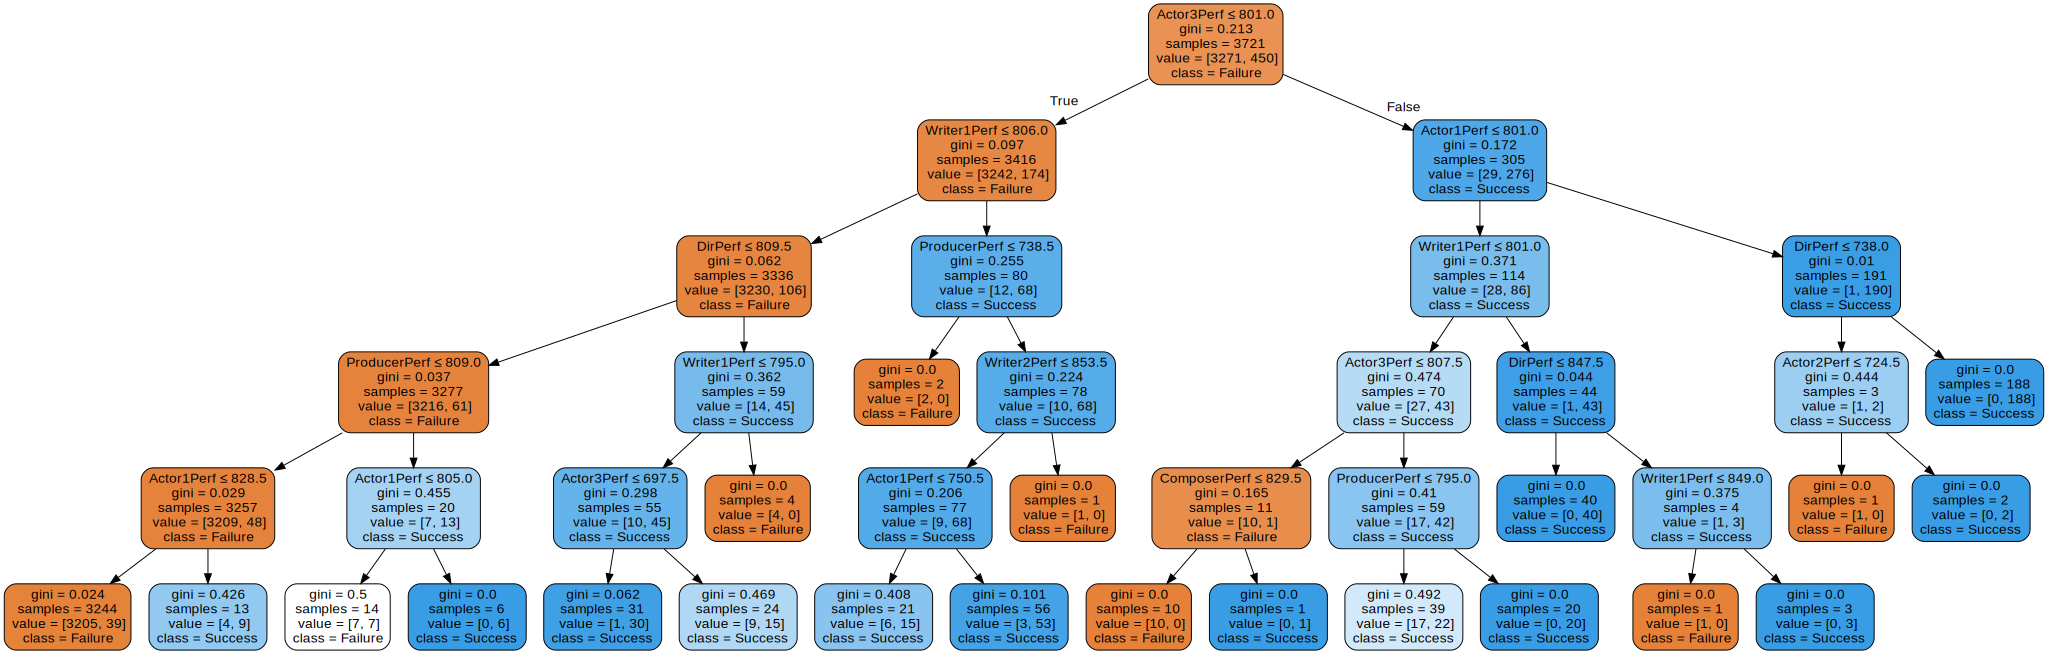

In [54]:
source1 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot_1 = Source(source1)
tree_plot_1

To get a better viewing experince we open up the graph in a reader:

In [105]:
graph = graphviz.Source(source1)
graph.render("image1",view=True)

'image1.pdf'

This first graph display an importance by the performance of actor nr 3, which seemed strange. After some investigation we noticed that when imdb's table of connections gives us the 10 most important persons connected to a movie, the number 1 spot is put at the back of that list. This makes actor nr 3 actually number 2, and nr 1 is probably filtered out when the 3 first actors are selected.

A quick fix for this was to change the way we read the file, shifting the array on step back while adding the last index to index 0.

We define a new "build_performance_pair"-function and have it take into account which position the actors are in: 

In [58]:
def build_performance_pairs_new(arr, movie, index, perf_list, size):
    length = len(movie[index])
    new_arr = movie[index][0:length-1]
    new_arr.insert(0, movie[index][length-1])
    for i in range(size):
        if(i < length):
            arr.append(new_arr[i])
            arr.append(round(get_perf(new_arr[i], perf_list), 2))
        else:
            arr.append(0)
            arr.append(0)
    

In [60]:
full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs_new(movies_with_numbers, movie, 3, actor_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

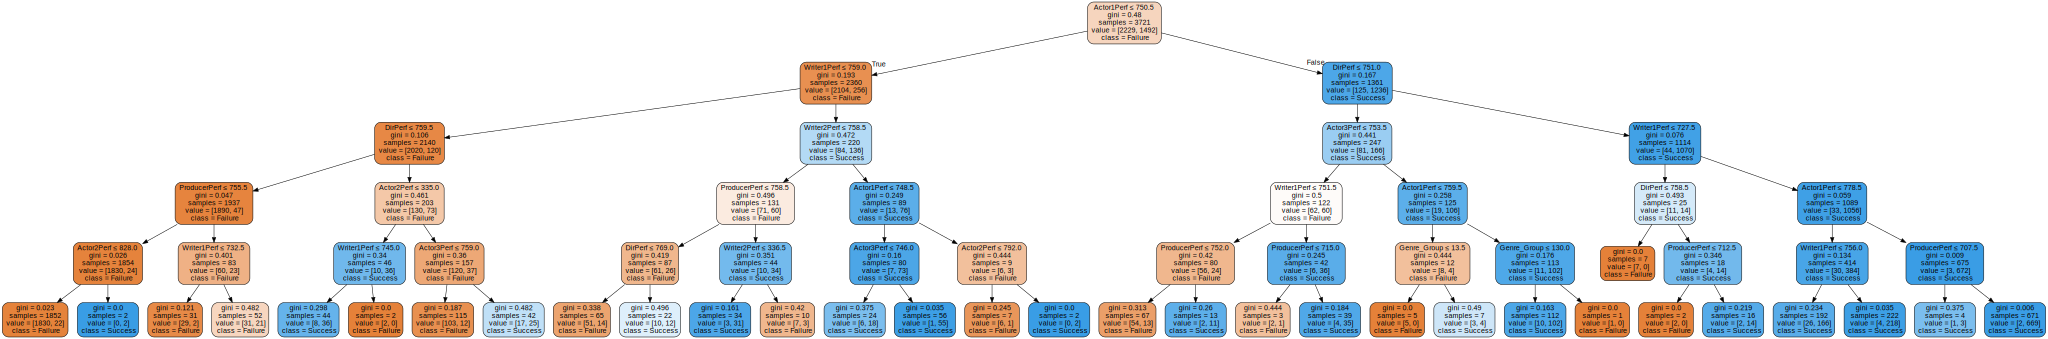

In [62]:
pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})

full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)
#full_arr_df_tree = full_arr_df_tree

test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 750, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.values, y_train.values)

source2 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source2)

tree_plot

Voila! Actor 1 performance is now the most important attribute for a movie. 

In [106]:
graph = graphviz.Source(source2)
graph.render("image2",view=True)

'image2.pdf'

Here we remove any incomplete row, leaving us with 737 rows

In [64]:
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Actor1Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Actor2Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Actor3Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.DirPerf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Writer1Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Writer2Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.Writer3Perf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.ProducerPerf != 0]
full_arr_df_tree = full_arr_df_tree[full_arr_df_tree.ComposerPerf != 0]

full_arr_df_tree

,Rating,Genre_Group,Nr_of_Ratings,Actor1Perf,Actor2Perf,Actor3Perf,DirPerf,Writer1Perf,Writer2Perf,Writer3Perf,ProducerPerf,ComposerPerf,Success
1,790,92,2701,790,800,790,805,790,790,790,739,790,1
2,690,84,1572,690,774,690,695,690,745,690,690,660,0
4,770,89,23803,710,720,693,770,770,770,770,739,746,1
10,630,90,1865,630,710,711,630,630,705,675,739,746,0
13,710,84,640,744,610,690,720,722,722,745,710,680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,740,71,1731,740,740,740,740,740,740,740,739,746,0
4942,750,84,7192,750,750,720,750,750,750,750,739,746,0
4951,760,2,556882,778,753,760,795,778,760,760,739,746,1
4952,790,84,13649,790,790,790,790,790,790,790,739,746,1


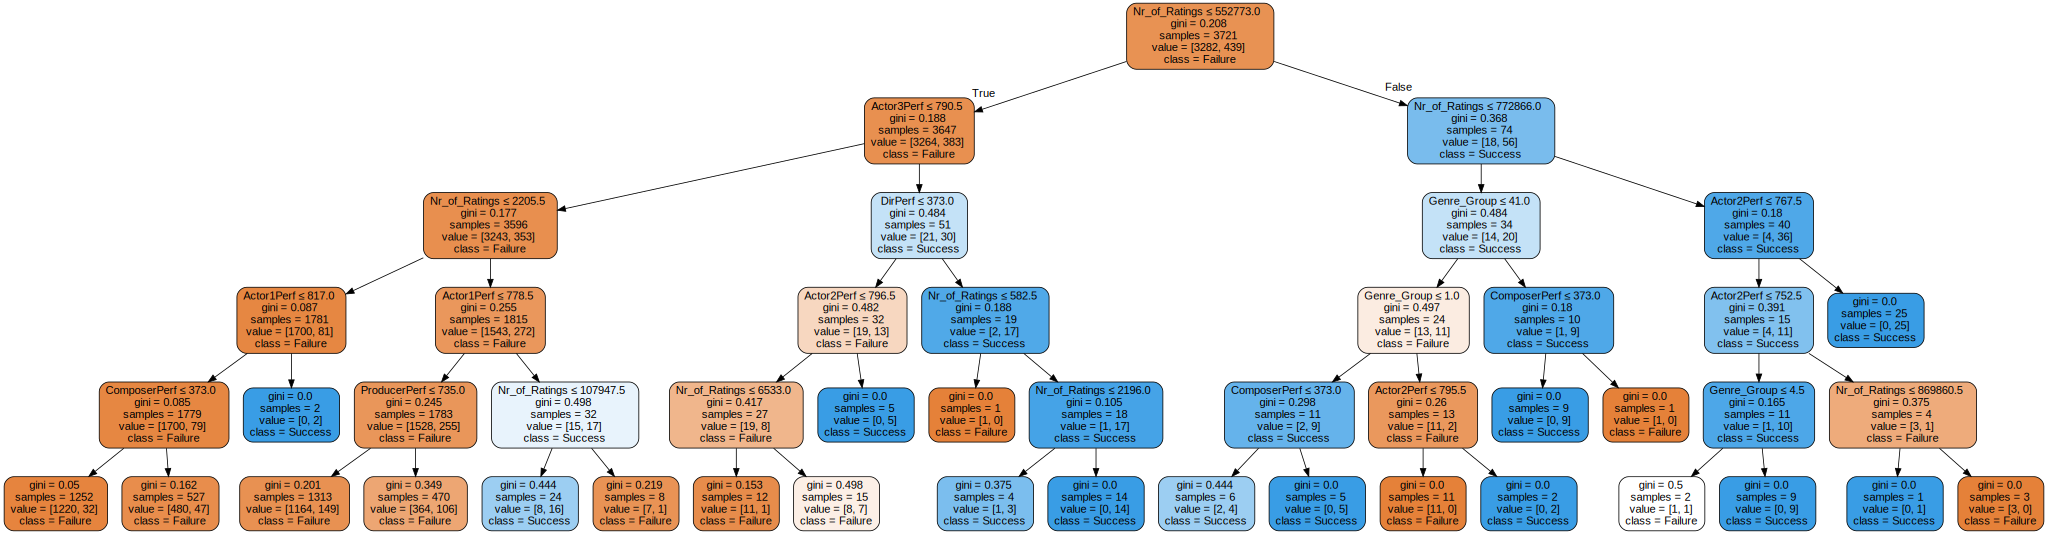

In [110]:
test_data = full_arr_df_tree.filter(['Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.values, y_train.values)

source3 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source3)

tree_plot

In [113]:
graph = graphviz.Source(source3)
graph.render("image3",view=True)

Error: Could not open "image3.pdf" for writing : Permission denied


CalledProcessError: Command '['dot', '-Tpdf', '-O', 'image3']' returned non-zero exit status 1. [stderr: b'Error: Could not open "image3.pdf" for writing : Permission denied\r\n']

,Rating,Genre_Group,Nr_of_Ratings,Actor1Perf,Actor2Perf,Actor3Perf,DirPerf,Writer1Perf,Writer2Perf,Writer3Perf,ProducerPerf,ComposerPerf,Success
0,730,48,3392,720,740,0,0,0,0,0,0,0,0
1,790,92,2701,0,800,0,0,0,0,0,746,0,0
2,690,84,1572,0,774,0,0,0,0,0,0,0,0
3,730,84,1512,0,0,0,0,0,0,0,0,0,0
4,770,89,23803,0,0,0,0,0,0,0,746,746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,850,88,44203,0,0,0,746,746,0,0,746,746,1
4958,720,84,14548,0,0,0,0,746,0,0,0,746,0
4959,710,92,8545,0,0,700,0,746,0,0,0,0,0
4960,730,72,57,0,0,0,0,0,0,0,746,0,0


To further improve the results, this time we only use actors who have appeared in at least 5 movies in our data set.

In [84]:
actor5_avg_scores = []
director5_avg_scores = []
writer5_avg_scores = []
producer5_avg_scores = []
composer5_avg_scores = []

with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actor5_avg_scores.append(row)
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            director5_avg_scores.append(row)
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            writer5_avg_scores.append(row)
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            producer5_avg_scores.append(row)
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            composer5_avg_scores.append(row)
            
for pair in actor5_avg_scores:
    pair[1] = float(pair[1])
for pair in director5_avg_scores:
    pair[1] = float(pair[1])
for pair in writer5_avg_scores:
    pair[1] = float(pair[1])
for pair in producer5_avg_scores:
    pair[1] = float(pair[1])
for pair in composer5_avg_scores:
    pair[1] = float(pair[1])

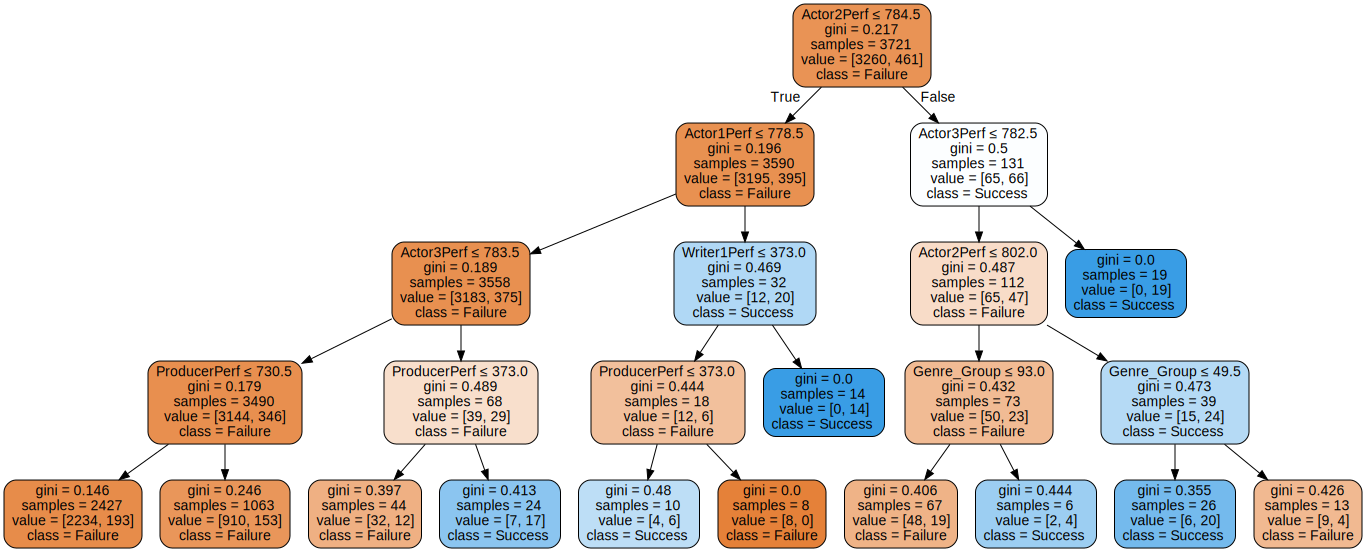

In [121]:
full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs_new(movies_with_numbers, movie, 3, actor5_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director5_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer5_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer5_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer5_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})

full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)

test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train.values, y_train.values)

source4 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source4)

tree_plot

In [124]:
graph = graphviz.Source(source4)
graph.render("image4",view=True)

'image4.pdf'

To display the difference in performance list we make a table with them side to side:

In [93]:
actors = []
actors5 = []

with open('actors.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actors.append(row)
            
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actors5.append(row)

actor_avg_scores_df = pd.DataFrame(actors)
actor_avg_scores_df = actor_avg_scores_df.sort_values(by=[1], ascending=False)
actor_avg_scores_df = actor_avg_scores_df.rename(columns={0:"All Actors",1:"All Ratings"})
actor_avg_scores_df.head(20)

,All Actors,All Ratings
8555,RodStrohl,9.5
8548,PhilipBarantini,9.5
8549,ScottGrimes,9.5
8550,DamianLewis,9.5
8551,ShaneTaylor,9.5
8552,DonnieWahlberg,9.5
8553,PeterYoungbloodHills,9.5
8554,MatthewLeitch,9.5
12746,JustineEvans,9.4
12739,MikeHolding,9.4


In [126]:
actor5_avg_scores_df = pd.DataFrame(actors5)
actor5_avg_scores_df = actor5_avg_scores_df.sort_values(by=[1], ascending=False)
actor5_avg_scores_df = actor5_avg_scores_df.rename(columns={0:"Filtered_Actors",1:"Filtered_Ratings"})
actor5_avg_scores_df.head(20)

,Filtered_Actors,Filtered_Ratings
423,SenerSen,8.72857142857143
461,AdileNasit,8.52
258,RinaZelyonaya,8.5
3,VasiliyLivanov,8.399999999999999
453,GeorgeCarlin,8.366666666666665
433,IanMcKellen,8.36
434,OrlandoBloom,8.34
462,HalitAkçatepe,8.3375
126,VyacheslavTikhonov,8.27142857142857
432,ElijahWood,8.260000000000002


In [109]:
unique_genres[0:50]

[[''],
 ['Action'],
 ['Action', 'Adventure'],
 ['Action', 'Animation'],
 ['Action', 'Comedy'],
 ['Action', 'Crime'],
 ['Action', 'Documentary'],
 ['Action', 'Drama'],
 ['Action', 'Fantasy'],
 ['Action', 'Foreign'],
 ['Action', 'History'],
 ['Action', 'Horror'],
 ['Action', 'Mystery'],
 ['Action', 'Romance'],
 ['Action', 'ScienceFiction'],
 ['Action', 'Thriller'],
 ['Action', 'War'],
 ['Action', 'Western'],
 ['Adventure'],
 ['Adventure', 'Animation'],
 ['Adventure', 'Comedy'],
 ['Adventure', 'Crime'],
 ['Adventure', 'Documentary'],
 ['Adventure', 'Drama'],
 ['Adventure', 'Family'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'History'],
 ['Adventure', 'Mystery'],
 ['Adventure', 'Romance'],
 ['Adventure', 'ScienceFiction'],
 ['Adventure', 'Thriller'],
 ['Adventure', 'War'],
 ['Adventure', 'Western'],
 ['Animation'],
 ['Animation', 'Comedy'],
 ['Animation', 'Crime'],
 ['Animation', 'Documentary'],
 ['Animation', 'Drama'],
 ['Animation', 'Family'],
 ['Animation', 'Fantasy'],
 ['Animation', '

In [129]:
full_arr_df[0:50]

,Rating,Genre_Group,Nr_of_Ratings,Actor1,Actor1Perf,Actor2,Actor2Perf,Actor3,Actor3Perf,Dir,DirPerf,Writer1,Writer1Perf,Writer2,Writer2Perf,Writer3,Writer3Perf,Producer,ProducerPerf,Composer,ComposerPerf
0,7.3,48.0,3392,RichardAttenborough,7.20,JackHawkins,7.40,NigelPatrick,0.00,BasilDearden,0.00,JohnBoland,0.00,BryanForbes,0.0,0,0.0,MichaelRelph,0.00,PhilipGreen,0.00
1,7.9,92.0,2701,EvgeniyUrbanskiy,0.00,InnokentiySmoktunovskiy,8.00,TatyanaSamoylova,0.00,MikhailKalatozov,0.00,GrigoriyKoltunov,0.00,ValeriOsipov,0.0,ViktorRozov,0.0,,7.46,NikolaiKryukov,0.00
2,6.9,84.0,1572,CarloGiustini,0.00,AnthonyQuinn,7.74,YôkoTani,0.00,NicholasRay,0.00,HansRuesch,0.00,FrancoSolinas,0.0,BaccioBandini,0.0,MalenoMalenotti,0.00,AngeloFrancescoLavagnino,0.00
3,7.3,84.0,1512,PaulBisciglia,0.00,JessHahn,0.00,MichèleGirardon,0.00,ÉricRohmer,0.00,PaulGégauff,0.00,0,0.0,0,0.0,ClaudeChabrol,0.00,LouisSaguer,0.00
4,7.7,89.0,23803,AlexandreRignault,0.00,PierreBrasseur,0.00,AlidaValli,0.00,GeorgesFranju,0.00,PierreGascar,0.00,JeanRedon,0.0,PierreBoileau,0.0,,7.46,,7.46
5,7.9,NaN,66360,Henri-JacquesHuet,0.00,Jean-PaulBelmondo,7.32,JeanSeberg,0.00,Jean-LucGodard,0.00,FrançoisTruffaut,0.00,ClaudeChabrol,0.0,0,0.0,GeorgesdeBeauregard,0.00,MartialSolal,0.00
6,8.1,84.0,3928,KeijiSada,0.00,SetsukoHara,0.00,YôkoTsukasa,7.83,YasujirôOzu,0.00,TonSatomi,0.00,KôgoNoda,0.0,0,0.0,ShizuoYamanouchi,0.00,TakanobuSaitô,0.00
7,7.2,84.0,1074,BernardLee,0.00,RichardAttenborough,7.20,PierAngeli,0.00,GuyGreen,0.00,RichardGregson,0.00,BryanForbes,0.0,0,0.0,,7.46,MalcolmArnold,0.00
8,8.3,50.0,148822,RayWalston,0.00,JackLemmon,7.42,ShirleyMacLaine,7.11,BillyWilder,0.00,I.A.L.Diamond,0.00,0,0.0,0,0.0,,7.46,AdolphDeutsch,0.00
9,7.9,91.0,23649,DominiqueBlanchar,0.00,GabrieleFerzetti,6.88,MonicaVitti,7.53,MichelangeloAntonioni,0.00,ElioBartolini,0.00,ToninoGuerra,0.0,0,0.0,AmatoPennasilico,0.00,GiovanniFusco,0.00


## Evaluation of results

*Document an evaluation your analysis results and describe how potentially actionable they are.*

*Replace the contents of this cell with your own text.*

## Schedule and description of project plan

*Rough schedule for the project beyond the pilot study presented in 3-5. This does not have to be advanced, you can simply provide an estimate based upon reported schedules for similar projects in the literature.*

*Replace the contents of this cell with your own text.*

## Ethical aspects that need to be considered

*Are there ethical aspects that need to be considered? Are there legal implications (e.g., personal data / GDPR)? Are there implications if the case organization is a business, public authority, or nonprofit entity?*

*Replace the contents of this cell with your own text.*